## Observations and Insights 

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the data table for preview
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
#Checking data types in dataframe
mouse_metadata.dtypes

Mouse ID        object
Drug Regimen    object
Sex             object
Age_months       int64
Weight (g)       int64
dtype: object

In [5]:
# Display the data table for preview
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
 #Checking data types in dataframe
study_results.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [53]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
#Checking the size os the dataframe
combined_df.shape

(1893, 8)

In [41]:
# Checking the number of mice.
mice_total = len(combined_df['Mouse ID'].value_counts())
mice_total

249

In [65]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_time = combined_df[combined_df[['Mouse ID', 'Timepoint']].duplicated(keep='first')] 
duplicated_mice_time['Mouse ID'].value_counts()

g989    5
Name: Mouse ID, dtype: int64

In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
deduplicated_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first', inplace=False)

deduplicated_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first', inplace=False)

deduplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# Checking the number of mice in the clean DataFrame.

total_mice_clean_df = len(deduplicated_df['Mouse ID'])
total_mice_clean_df

1888

## Summary Statistics

In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_df =deduplicated_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = round(regimen_df['Tumor Volume (mm3)'].mean(), 2)
regimen_median = round(regimen_df['Tumor Volume (mm3)'].median(), 2)
regimen_var = round(regimen_df['Tumor Volume (mm3)'].var(), 2)
regimen_std = round(regimen_df['Tumor Volume (mm3)'].std(), 2)
regimen_sem = round(regimen_df['Tumor Volume (mm3)'].sem(), 2)

# Assemble the resulting series into a single summary dataframe.
stats_summary = pd.DataFrame({'Mean': regimen_mean,\
                             'Meadian': regimen_median,\
                             'Variance':regimen_var,\
                             'Standard Deviation': regimen_std,\
                             'SEM value': regimen_sem})
stats_summary
regimen_sem
stats_summary

,Mean,Meadian,Variance,Standard Deviation,SEM value
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [127]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimen_df =deduplicated_df.groupby('Drug Regimen')
stats_summary2 = regimen_df['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem']).round(2)
stats_summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

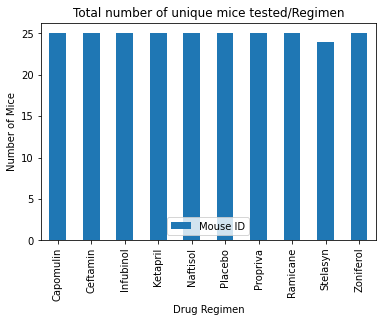

In [154]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_nunique = regimen_df['Mouse ID'].nunique()
mice_nunique_df = pd.DataFrame(mice_nunique)
mice_nunique_df.plot(kind='bar')

plt.title("Total number of unique mice tested/Regimen")
plt.ylabel("Number of Mice")

Text(30.25, 0.5, 'Number of Mice')

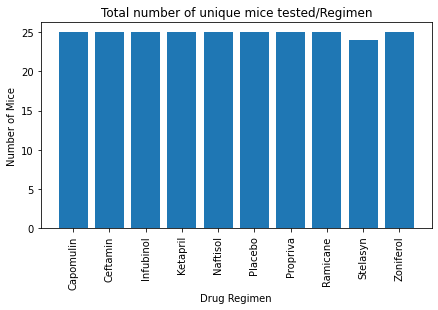

In [152]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure()
plt.bar(mice_nunique.index, mice_nunique)
plt.xticks(rotation="vertical")
plt.tight_layout()

# Set a Title and labels
plt.title("Total number of unique mice tested/Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

(-1.1032653842934317,
 1.1062424936743747,
 -1.1053783266922992,
 1.1002561107948714)

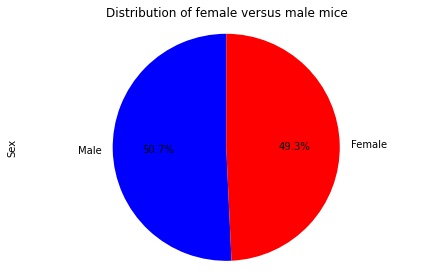

In [195]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['b', 'r']
mice_piechart = deduplicated_df['Sex'].value_counts().plot(kind="pie", startangle=90, autopct="%1.1f%%",  colors=colors)
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.tight_layout()
plt.axis("equal")






<ipython-input-194-4f80c07db894>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes, explode=explode, labels=labels, colors=colors,


(-1.1032653842934317,
 1.1062424936743747,
 -1.1053783266922992,
 1.1002561107948714)

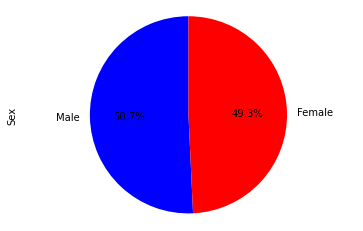

In [194]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [deduplicated_df['Sex'].value_counts()]
labels = ["Male", "Female"]
colors = ['b', 'r']
explode = [0, 0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)
plt.ylabel("Sex")
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
